In [3]:
import pandas as pd

In [2]:
'''
MacOS专用字体设置
MacOS 系统中使用的中文字体路径
适用于MacOS15版本
可直接复制到代码中使用
'''
import matplotlib.pyplot as plt
from matplotlib import font_manager
# 设置字体路径
font_path = '/System/Library/Fonts/STHeiti Medium.ttc'

# 加载字体
my_font = font_manager.FontProperties(fname=font_path)

# 设置为默认字体
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

In [4]:
df = pd.read_excel('股票客户流失.xlsx')

In [4]:
df.head()

,账户资金（元）,最后一次交易距今时间（天）,上月交易佣金（元）,累计交易佣金（元）,本券商使用时长（年）,是否流失
0,22686.5,297,149.25,2029.85,0,0
1,190055.0,42,284.75,3889.50,2,0
2,29733.5,233,269.25,2108.15,0,1
3,185667.5,44,211.50,3840.75,3,0
4,33648.5,213,353.50,2151.65,0,1


In [5]:
df.isnull().sum()

账户资金（元）          0
最后一次交易距今时间（天）    0
上月交易佣金（元）        0
累计交易佣金（元）        0
本券商使用时长（年）       0
是否流失             0
dtype: int64

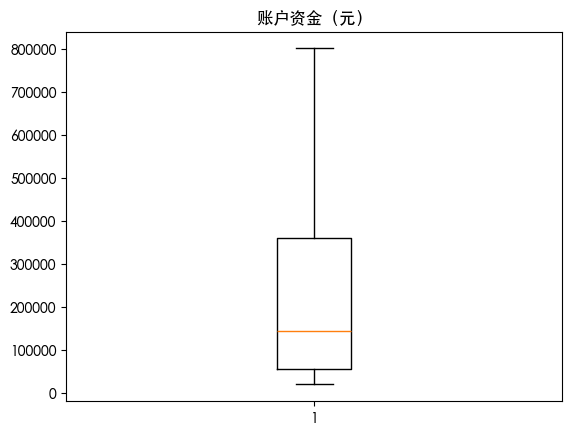

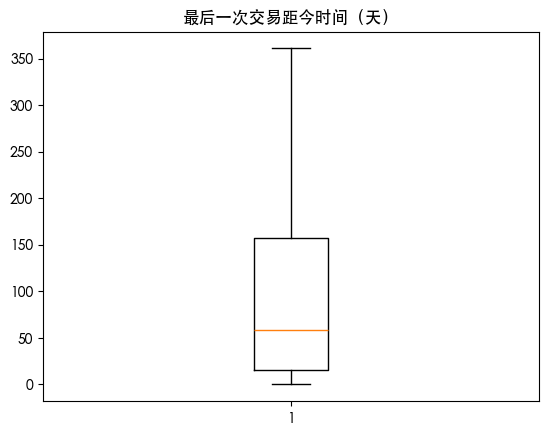

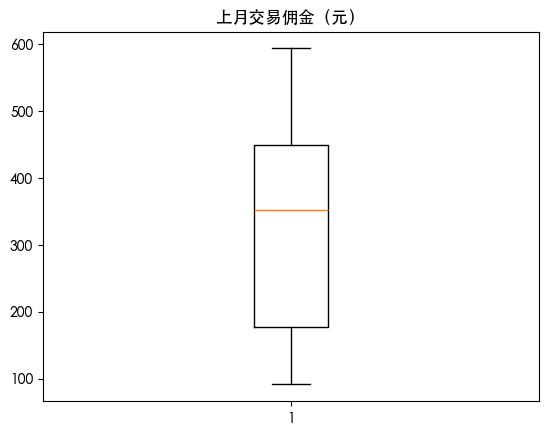

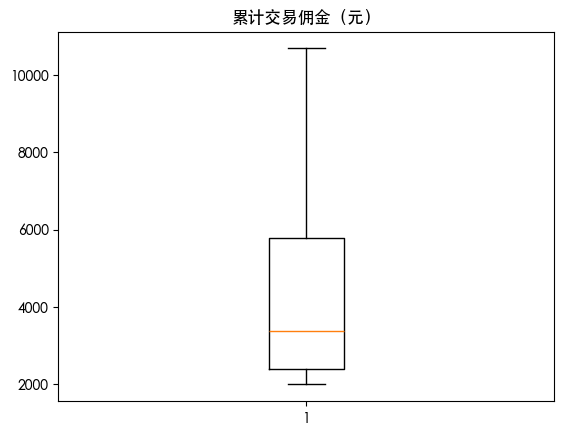

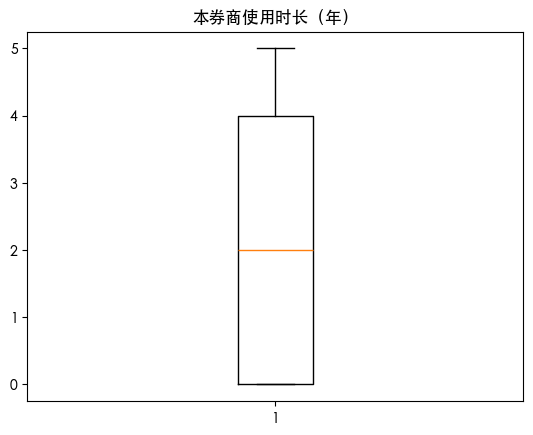

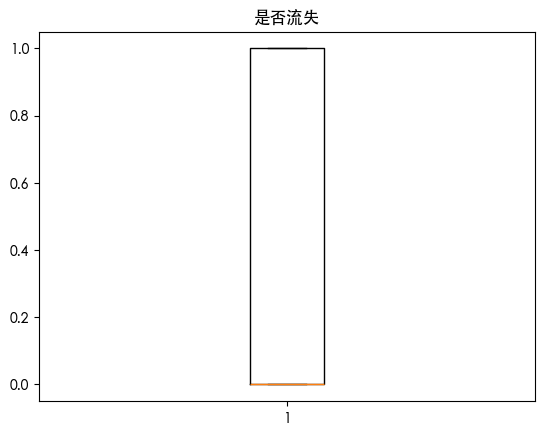

In [7]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

# 逻辑回归

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['是否流失'])
y = df['是否流失']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.794889992902768
Confusion Matrix:
 [[952  84]
 [205 168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



# SVM

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)

y_svc_pred = svc.predict(X_test)
y_svc_proba = svc.predict_proba(X_test)[:, 1]

def calculate_ks(y_true, y_proba):
    data = np.column_stack([y_proba, y_true])
    sorted_data = data[data[:, 0].argsort()[::-1]]
    
    total_pos = np.sum(y_true == 1)
    total_neg = np.sum(y_true == 0)
    
    cum_pos = 0
    cum_neg = 0
    max_ks = 0
    
    for prob, label in sorted_data:
        if label == 1:
            cum_pos += 1
        else:
            cum_neg += 1
        tpr = cum_pos / total_pos
        fpr = cum_neg / total_neg
        ks = abs(tpr - fpr)
        if ks > max_ks:
            max_ks = ks
    return max_ks

ks_score = calculate_ks(y_test, y_svc_proba)

print("SVC Accuracy:", accuracy_score(y_test, y_svc_pred))
print("KS Score:", ks_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_svc_pred))
print("Classification Report:\n", classification_report(y_test, y_svc_pred))

SVC Accuracy: 0.7352732434350603
KS Score: 0.3043076588652996
Confusion Matrix:
 [[1036    0]
 [ 373    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


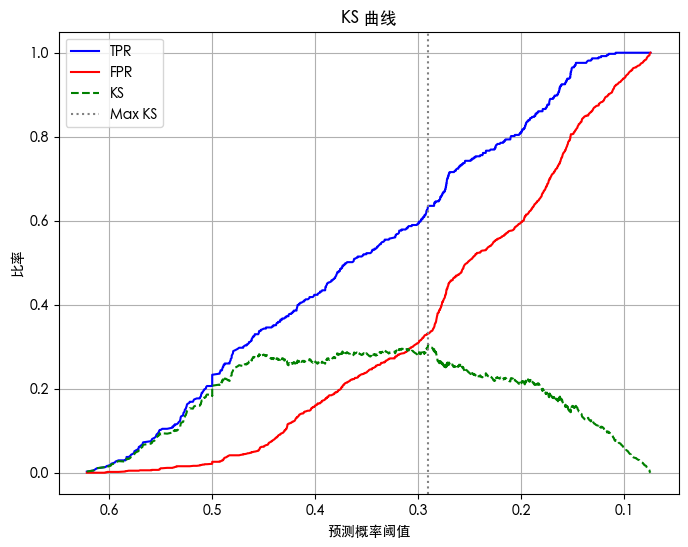

In [10]:
import matplotlib.pyplot as plt

def plot_ks_curve(y_true, y_proba):
    data = np.column_stack([y_proba, y_true])
    sorted_data = data[data[:, 0].argsort()[::-1]]
    
    total_pos = np.sum(y_true == 1)
    total_neg = np.sum(y_true == 0)
    
    cum_pos = 0
    cum_neg = 0
    tpr_list = []
    fpr_list = []
    thresholds = []
    
    for prob, label in sorted_data:
        if label == 1:
            cum_pos += 1
        else:
            cum_neg += 1
        tpr_list.append(cum_pos / total_pos)
        fpr_list.append(cum_neg / total_neg)
        thresholds.append(prob)
    
    ks_list = np.abs(np.array(tpr_list) - np.array(fpr_list))
    max_ks_idx = np.argmax(ks_list)
    
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, tpr_list, label='TPR', color='blue')
    plt.plot(thresholds, fpr_list, label='FPR', color='red')
    plt.plot(thresholds, ks_list, label='KS', color='green', linestyle='--')
    

    plt.axvline(x=thresholds[max_ks_idx], color='gray', linestyle=':', label=f'Max KS')
    plt.xlabel('预测概率阈值')
    plt.ylabel('比率')
    plt.title('KS 曲线')
    plt.legend()
    plt.grid(True)
    plt.gca().invert_xaxis()
    plt.show()

plot_ks_curve(y_test, y_svc_proba)

# KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_knn_pred = knn.predict(X_test)
y_knn_proba = knn.predict_proba(X_test)[:, 1]

ks_score_knn = calculate_ks(y_test, y_knn_proba)
print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))
print("KNN KS Score:", ks_score_knn)
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_knn_pred))
print("KNN Classification Report:\n", classification_report(y_test, y_knn_pred))

KNN Accuracy: 0.7579843860894251
KNN KS Score: 0.3060337242642873
KNN Confusion Matrix:
 [[940  96]
 [245 128]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      1036
           1       0.57      0.34      0.43       373

    accuracy                           0.76      1409
   macro avg       0.68      0.63      0.64      1409
weighted avg       0.73      0.76      0.74      1409



# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rm = RandomForestClassifier(n_estimators=100, random_state=42)
rm.fit(X_train, y_train)
y_rm_pred = rm.predict(X_test)
y_rm_proba = rm.predict_proba(X_test)[:, 1]

ks_score_rm = calculate_ks(y_test, y_rm_proba)
print("Random Forest Accuracy:", accuracy_score(y_test, y_rm_pred))
print("Random Forest KS Score:", ks_score_rm)
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_rm_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_rm_pred))

Random Forest Accuracy: 0.7686302342086586
Random Forest KS Score: 0.4444708975540074
Random Forest Confusion Matrix:
 [[909 127]
 [199 174]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.58      0.47      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



In [8]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
y_xgb_proba = xgb.predict_proba(X_test)[:, 1]

ks_score_xgb = calculate_ks(y_test, y_xgb_proba)
print("XGB Accuracy:", accuracy_score(y_test, y_xgb_pred))
print("XGB KS Score:", ks_score_xgb)
print("XGB Confusion Matrix:\n", confusion_matrix(y_test, y_xgb_pred))
print("XGB Classification Report:\n", classification_report(y_test, y_xgb_pred))

XGB Accuracy: 0.7835344215755855
XGB KS Score: 0.501951204364073
XGB Confusion Matrix:
 [[929 107]
 [198 175]]
XGB Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.62      0.47      0.53       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
